In [1]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
df.shape

(400, 3)

In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


[]

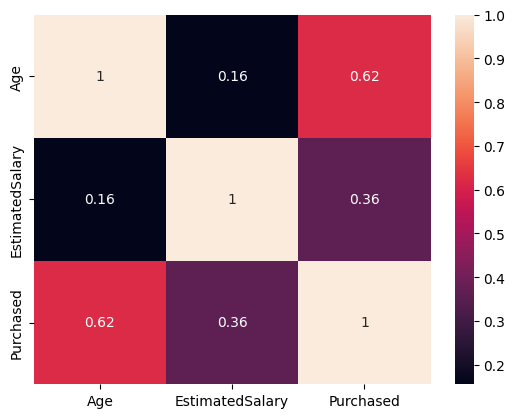

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [8]:
x = df[['Age']]
y = df['Purchased']

In [18]:
x

,Age
0,19
1,35
2,26
3,27
4,19
...,...
395,46
396,51
397,50
398,36


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [10]:
x_train.shape

(320, 1)

In [20]:
x_train

,Age
327,42
285,37
152,31
97,28
386,49
...,...
233,49
323,48
76,18
91,30


In [11]:
x_test.shape

(80, 1)

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
pred1 = model.predict(x_train)

In [13]:
accuracy_score(y_train,pred1)

0.84375

In [14]:
pred2 = model.predict(x_test)
accuracy_score(y_test,pred2)

0.825

In [15]:
cm  = confusion_matrix(y_test,pred2)
cm

array([[49,  4],
       [10, 17]], dtype=int64)

In [16]:
precision_recall_fscore_support(y_test,pred2)

(array([0.83050847, 0.80952381]),
 array([0.9245283 , 0.62962963]),
 array([0.875     , 0.70833333]),
 array([53, 27], dtype=int64))

In [17]:
from sklearn.metrics import classification_report
classification_report(y_test,pred2)

'              precision    recall  f1-score   support\n\n           0       0.83      0.92      0.88        53\n           1       0.81      0.63      0.71        27\n\n    accuracy                           0.82        80\n   macro avg       0.82      0.78      0.79        80\nweighted avg       0.82      0.82      0.82        80\n'